# k-近傍回帰

* k-最近傍法を使った回帰を行う変種

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

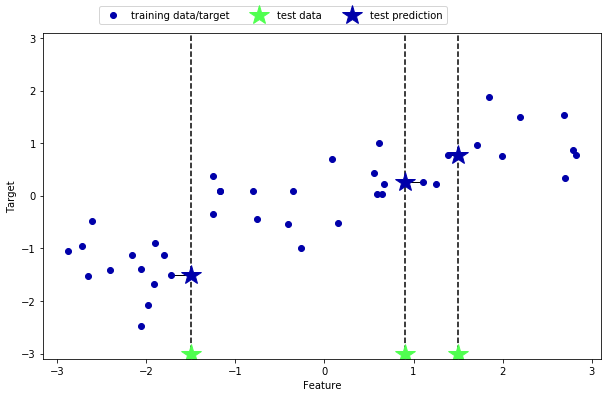

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

- 複数の最近傍点を用いることも可能
- 複数の最近傍点を用いる場合は最近傍点の平均値を用いる

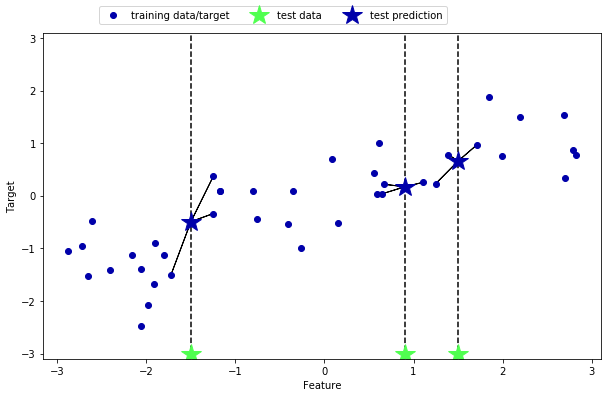

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

- 回帰の為のk-最近傍アルゴリズムはscikit-learnのKneighborsRegressonクラスに実装されている

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練
reg.fit(X_train, y_train)
# 予測
print("Test set predictions:\n{}".format(reg.predict(X_test)))
# スコア
print("Test set R^2:\n{:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:
0.83


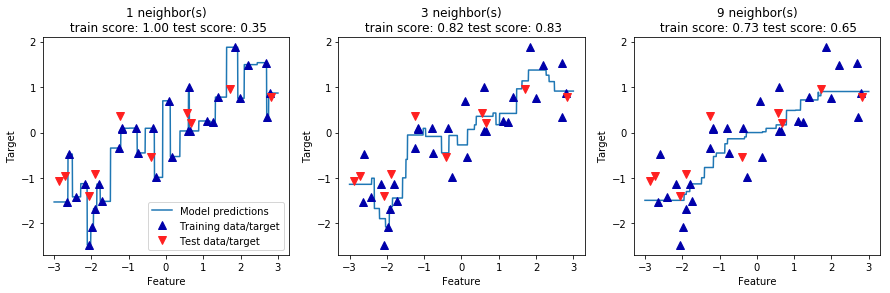

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
names = ['Alice', 'Bob', 'Charlie']
# -3 から3までの間に1,000点のデータポイントを作る
# reshape(-1)の意味が分からないx, 1の配列に変換されるみたいだ。引数の要素数ってことかな
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9の近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    # cm2は色っぽい
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

- 1最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えている
    - 予測は全て訓練データポイントを通っている
    - その為予測は非常に不安定になっている
- 考慮する最近傍点を増やすと予測はスムーズになるが、訓練データに対する適合度は下がる

### 利点、欠点、パラメタ
- Kneighbors分類器には重要なパラメタが2つある
    - 近傍点の数
    - データポイント間の距離測度
        - デフォルトはユークリッド距離を使用する。(ほとんどの場合これでうまくいく)
- 利点はモデルの理解のしやすさ。また、多くの場合あまり調整しなくても十分に高い性能を示す。
- 訓練セットが多くなると予測は遅くなる
    - データの前処理を行うことが重要
- ほとんどの特徴量が多くの場合0となるような「疎なデータセット」では特に性能が悪くなる
